In [2]:
import best

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

In [3]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
plt.rcParams['figure.figsize'] = [12, 8]

In [4]:
import numpy as np

In [5]:
import pathlib

In [6]:
import yaml

In [7]:
import utilities as u

In [8]:
import itertools

In [9]:
values_file = 'configurations/configILCall.yaml'
with open(values_file, 'r') as stream:
            data = yaml.safe_load(stream)

In [10]:


plots_directory = data['plotsdirectory']

analysis_directory = data['analysisdirectory']

savingdirectory = data['savingdirectory']

Nsims = data['Nsims']

results_directory = data['resultsdirectory']
spectra_path = data['spectra_path']
sims_directory = data['sims_directory']
WR = u.write_read(sims_directory)

PP = pathlib.Path(analysis_directory)
Pplots = pathlib.Path(plots_directory)

fgnamefiles = data['fgnamefiles']

estimators_dictionary = data['estimators']
estimators = list(estimators_dictionary.keys())

estimatorssub = data['estimatorssubset']

if estimatorssub != '':
    estimators = estimatorssub

lista_lmaxes = []

names = {}

for e in estimators:
    elemento = estimators_dictionary[e]
    names[e] = elemento['direc_name']
    lmax_min, lmax_max = elemento['lmax_min'], elemento['lmax_max']
    num = elemento['number']
    lista_lmaxes += [np.linspace(lmax_min, lmax_max, num, dtype = int)]

lmaxes_configs = list(itertools.product(*lista_lmaxes))


#CHOOSE nu
nu = estimators_dictionary[estimators[0]]['nu']

In [11]:

estimators_dictionary['symmpbh']

{'nu': ['ilc', 'ilc_depr_cib'],
 'hardening': 'srcspbh',
 'tszprofile': 1.0,
 'lmax_min': 3000,
 'lmax_max': 4500,
 'number': 4,
 'direc_name': 'sypbh',
 'color': 'yellow',
 'label': 'SymmPBH',
 'field_names': ['ilc', 'ilcdeprcib']}

In [12]:
def get_est_weights(Opt, index):
    '''
    index = 0, 1, ....
    e.g. h, s, b -> index = 1 gives s
    '''
    Nest = len(Opt.estimators)
    nbins = Opt.nbins
    zeros = np.zeros(Nest*nbins)
    for j in range(nbins):
        zeros[index+Nest*j:index+(Nest*j+1)] = 1.
    return zeros

In [13]:
fnb_getter = lambda Opt, fb_val, invvar: Opt.get_f_n_b(Opt.ells_selected, Opt.theory_selected, Opt.theta_selected, Opt.biases_selected,
                              sum_biases_squared = False, bias_squared = False, fb = fb_val, inv_variance = invvar, analytical = True)

In [14]:
lmin_sel, lmax_sel = data['lmin_sel'], data['lmax_sel']

optversion = data['optversion']

In [27]:
lref_ = 3500
reference_directory = pathlib.Path('output_ILC')/f'h{lref_}s{lref_}b{lref_}p{lref_}sy{lref_}sybh{lref_}sypbh{lref_}/total/'

kk = np.load(reference_directory/'kk_total_ilc.npy')
theta = np.load(reference_directory/'theta_total_ilc.npy')
ells = np.load(reference_directory/'ells_total_ilc.npy')
selection = (ells > 30) & (ells < 1200)
biases = np.load(reference_directory/'totalbias_total_ilc.npy')
noises_high = np.load(reference_directory/'N_total_ilc.npy')
estimators_reference = estimators
Optimizerkk_high = best.Opt(estimators_reference, lmin_sel, lmax_sel, ells, kk, theta, biases, noises_high)

In [28]:
Optimizerkk_lista.biases_selected/Optimizerkk_lista.theory_selected

array([[[0.01525434, 0.02254875, 0.0244604 , 0.02053023, 0.02808718,
         0.04103625, 0.04969011, 0.04364029]]])

In [29]:
reference_directory

PosixPath('output_ILC/h3500s3500b3500p3500sy3500sybh3500sypbh3500/total')

hu_ok
Simple test for fb = 0 [[[[[1.33336609e-05 1.21678690e-05 9.84190649e-06 7.13552098e-06
     3.65479179e-06 1.62981506e-06 5.83160066e-07 1.79523778e-07]]]]] [1.33336609e-05 1.21678690e-05 9.84190649e-06 7.13552098e-06
 3.65479179e-06 1.62981506e-06 5.83160066e-07 1.79523778e-07] 

shear
Simple test for fb = 0 [[[[[2.91348299e-05 2.40446035e-05 1.51383360e-05 7.00473434e-06
     2.33473805e-06 1.68694875e-06 4.84972520e-07 1.02950560e-07]]]]] [2.91348299e-05 2.40446035e-05 1.51383360e-05 7.00473434e-06
 2.33473805e-06 1.68694875e-06 4.84972520e-07 1.02950560e-07] 

bh
Simple test for fb = 0 [[[[[1.53903922e-05 1.39164947e-05 1.10033400e-05 7.65092420e-06
     3.59868566e-06 1.51486704e-06 5.36642900e-07 1.75817157e-07]]]]] [1.53903922e-05 1.39164947e-05 1.10033400e-05 7.65092420e-06
 3.59868566e-06 1.51486704e-06 5.36642900e-07 1.75817157e-07] 

pbh
Simple test for fb = 0 [[[[[1.65791192e-05 1.49191460e-05 1.16584864e-05 7.93575142e-06
     3.57725937e-06 1.45958609e-06 5.1014900

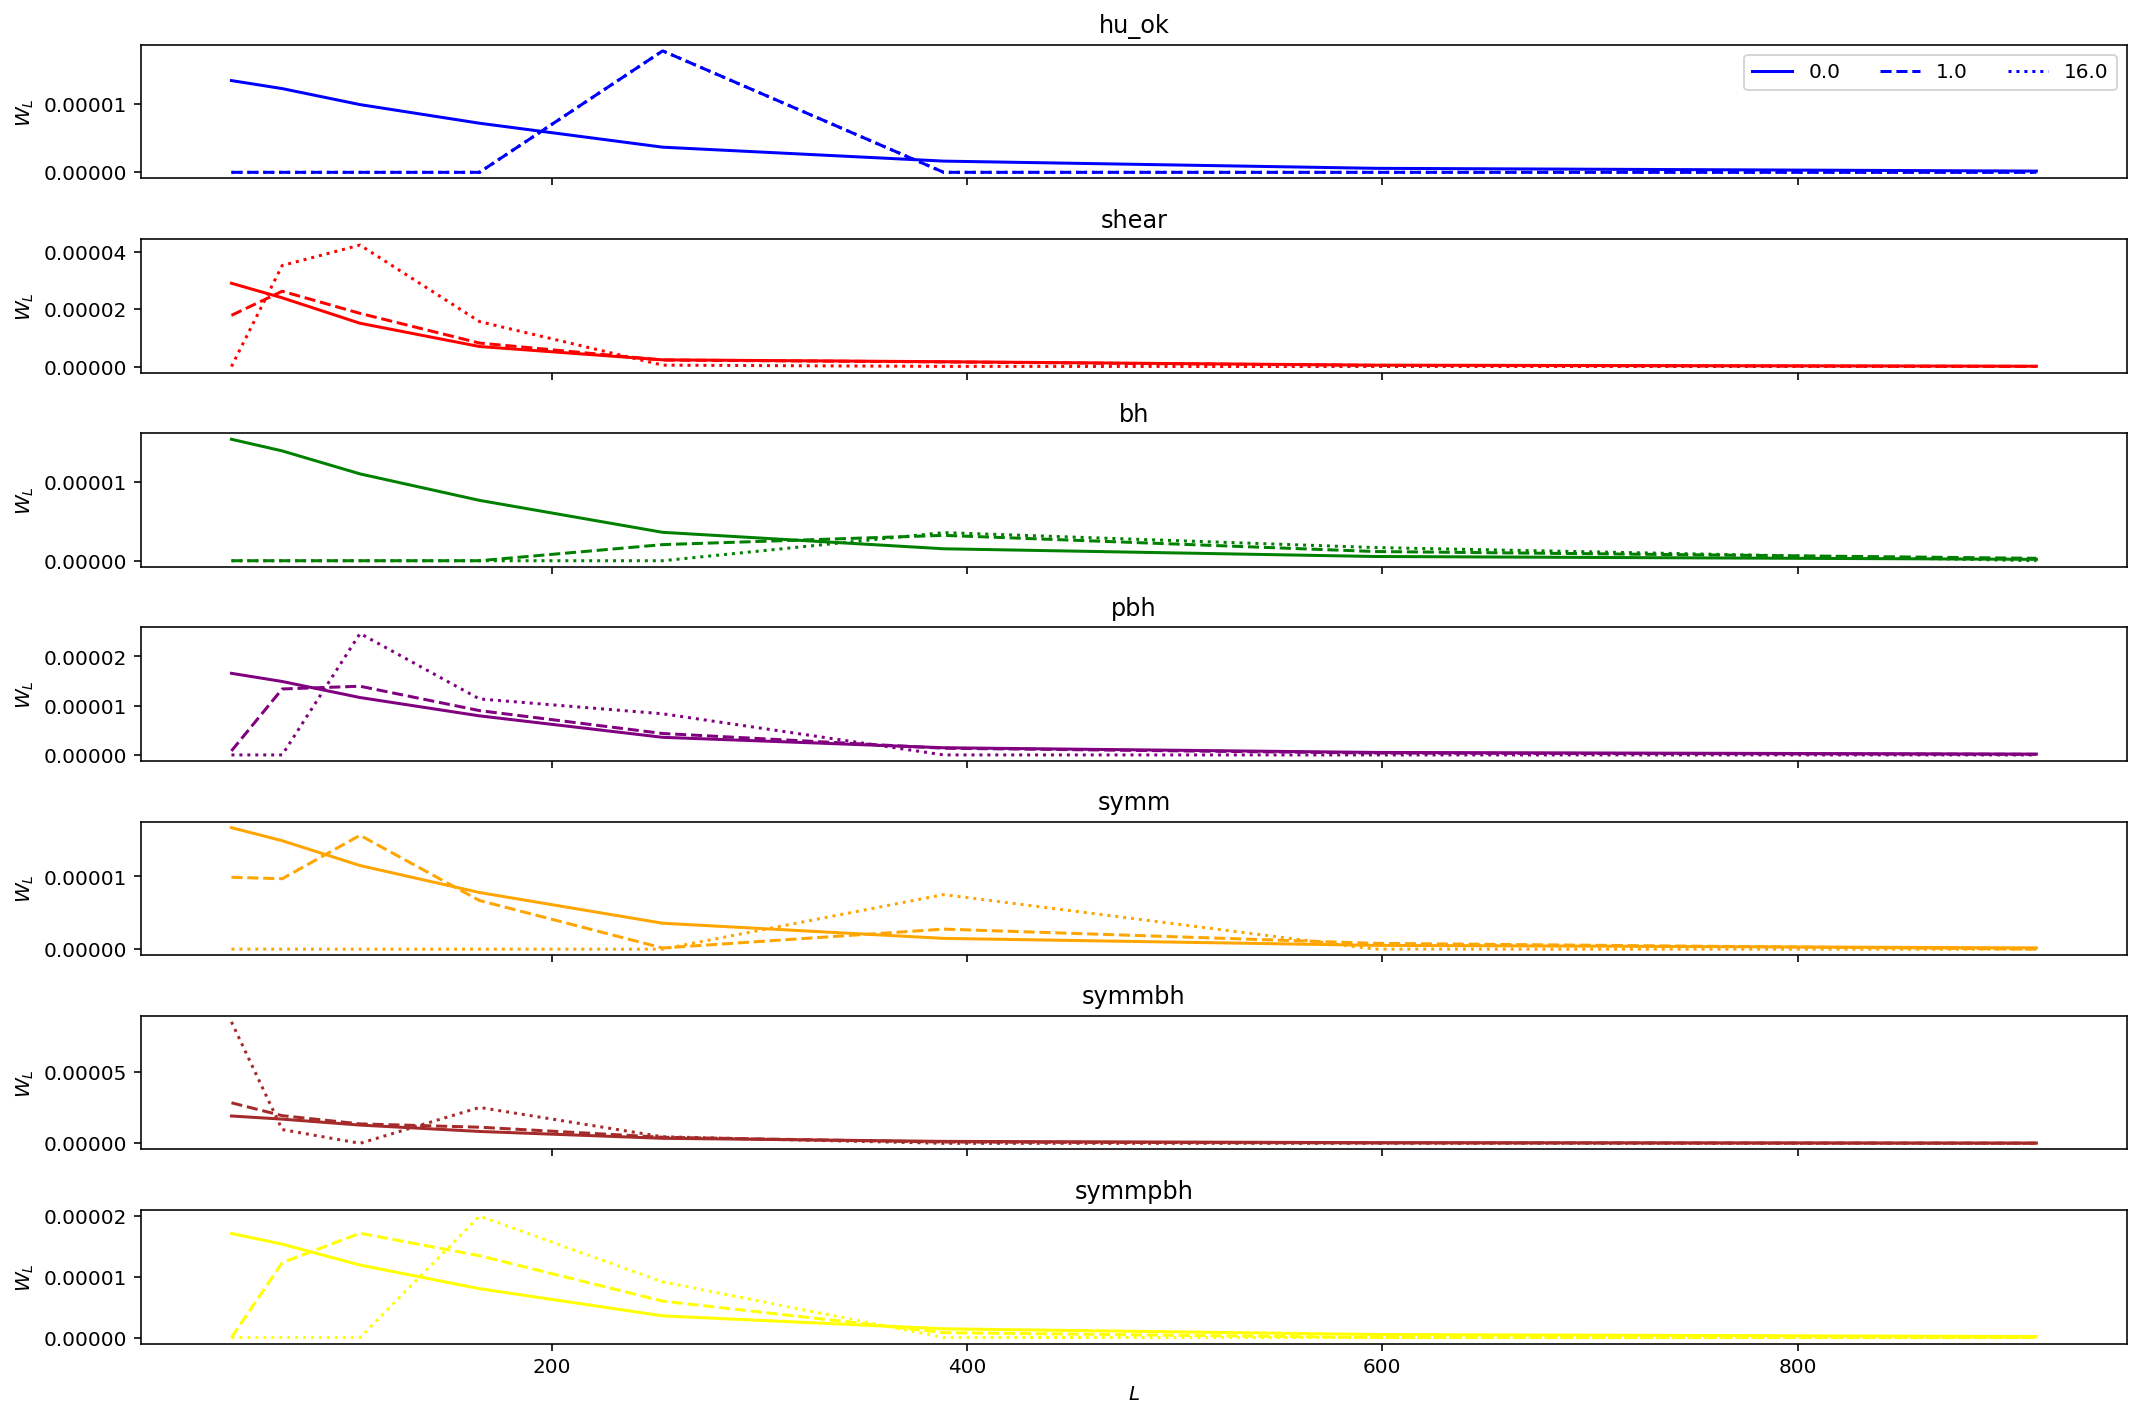

In [30]:
nbins = noises_high.shape[-1]
nsingle = np.zeros((1, 1, nbins))
bsingle = np.zeros((1, 1, nbins))
thetasingle = np.zeros((1, 1, 1, 1, nbins))

estimators_lista = estimators_reference
noises_lista = noises_high
biases_lista = biases
theta_lista = theta

fig, axs = plt.subplots(len(estimators_lista), sharex = True, figsize = (15, 10))

allbiases = {}
allnoises = {}

allws = {}

partial = {}

for i, e in enumerate(estimators_lista):
    nsingle[0, 0] = noises_lista[i, i]
    bsingle[0, 0] = biases_lista[i, i]
    thetasingle[0, 0, 0, 0] = theta_lista[i, i, i, i]
    print(e)
    Optimizerkk_lista = best.Opt([e], lmin_sel, lmax_sel, ells, kk, thetasingle, bsingle, nsingle)
    filtered = Optimizerkk_lista.filter_(abs(Optimizerkk_lista.biases_selected), sigma = 1.5)
    Optimizerkk_lista = best.Opt([e], lmin_sel, lmax_sel, Optimizerkk_lista.ells_selected, Optimizerkk_lista.theory_selected, Optimizerkk_lista.theta_selected, filtered, Optimizerkk_lista.noises_selected)
    
    x = np.ones(Optimizerkk_lista.nbins)
    
    tempb = []
    tempn = []
    
    allws[e] = {}
    partial[e] = {}
    
    for fb, ls in zip([0., 1., 16.], ['-', '--', ':']):
        w = Optimizerkk_lista.get_weight_per_l_analytical(x, False, fb)
        wMV_non_bounded = Optimizerkk_lista.get_mv_weights(Optimizerkk_lista.ells_selected, Optimizerkk_lista.theory_selected, Optimizerkk_lista.theta_selected)
        if fb == 0:
            print('Simple test for fb = 0', wMV_non_bounded, w, '\n')
        f, n, b = fnb_getter(Optimizerkk_lista, fb, False)
        xx = x
        tempb += [b(xx)]
        tempn += [n(xx)]
        el = Optimizerkk_lista.ells_selected
        if i == 0:
            label = fb
        else:
            label = None
        axs[i].plot(el, w, label = label, color = estimators_dictionary[e]['color'], ls = ls)
        
        allws[e][fb] = w
        
        partial[e][fb] = (Optimizerkk_lista.theta_selected/Optimizerkk_lista.theory_selected**2.*w**2+fb*b(xx)*Optimizerkk_lista.biases_selected/Optimizerkk_lista.theory_selected*w)[0, 0, 0, 0, :]
        
        
    allbiases[e] = tempb
    allnoises[e] = tempn
    
    
    axs[i].set_ylabel('$W_L$')
    axs[i].set_title(e)

axs[-1].set_xlabel('$L$')
axs[0].legend(ncol = 3)
fig.tight_layout()
plt.show()

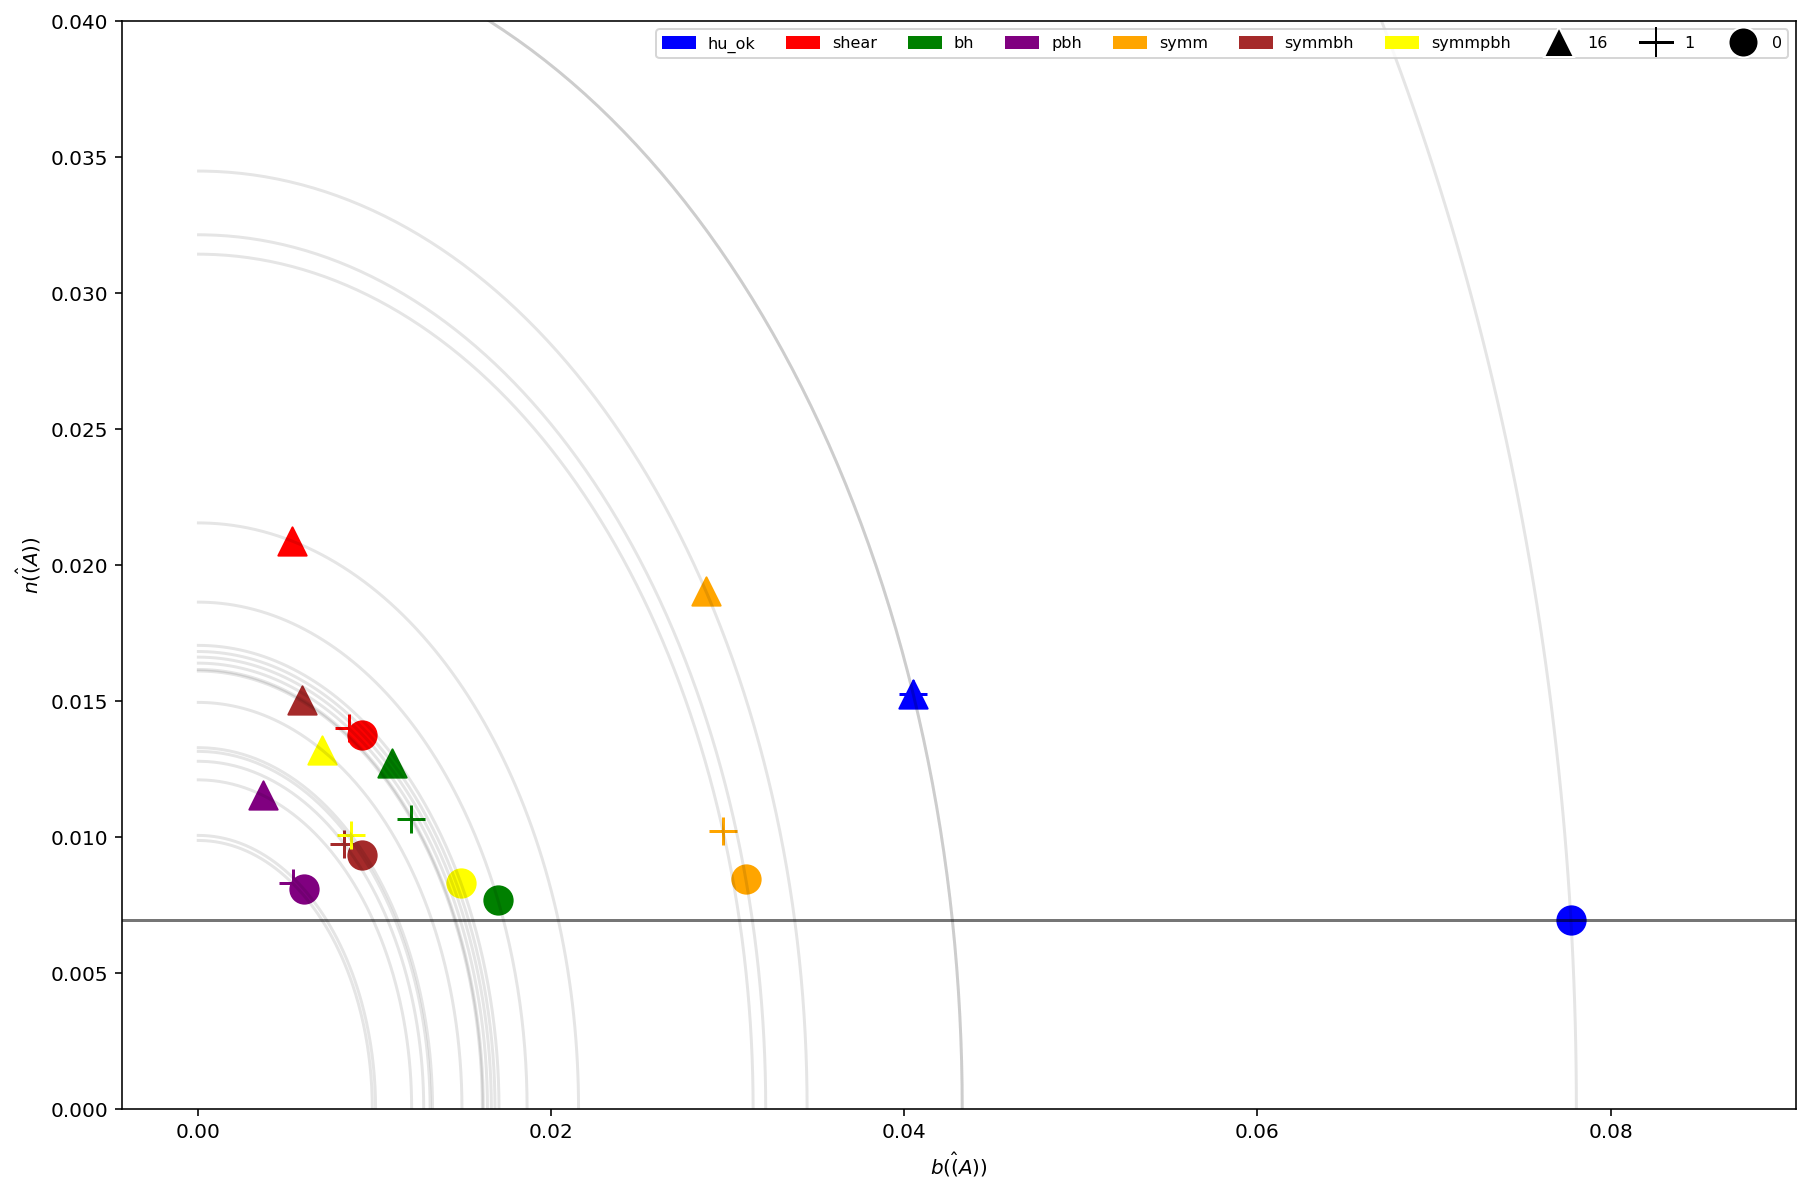

In [31]:
fig, ax = plt.subplots(figsize = (15, 10))

patches = []

for i, e in enumerate(estimators_lista):
    
    markers = ['o', '+', '^']
    for j in range(3):
        b, n = allbiases[e][j], allnoises[e][j]
        ax.scatter(b, n, marker = markers[j], color = estimators_dictionary[e]['color'], s = 200)
        
        theta = np.arange(0, np.pi / 2, 0.01)
        r0 = np.sqrt(b**2+n**2)
        ax.plot(r0 * np.cos(theta), r0 * np.sin(theta), color = 'black', alpha = 0.1)

    ax.axhline(allnoises['hu_ok'][0], color = 'black', alpha = 0.1)
    patches += [mpatches.Patch(color = estimators_dictionary[e]['color'], label = e)]
    
    
    
    
    

patches += [Line2D([0], [0], marker='^', color='w', label='16',
                        markerfacecolor='black', markersize=15)]    
patches += [Line2D([0], [0], marker='+', color='black', label='1',
                        markerfacecolor='black', markersize=15)] 
patches += [Line2D([0], [0], marker='o', color='w', label='0',
                        markerfacecolor='black', markersize=15)] 
    
ax.set_xlabel('$b(\\hat(A))$')
ax.set_ylabel('$n(\\hat(A))$')

ax.set_ylim(0, 0.04)

ax.legend(handles = patches, ncol = len(estimators_lista)+3, prop = {'size': 8})

plt.show()

In [21]:
np.nan_to_num(partial[e][fb]**-1.)

/home/r/rbond/omard/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in reciprocal
  """Entry point for launching an IPython kernel.


array([6.93143821e+006, 1.01902475e+007, 3.59834782e+008, 1.48926088e+008,
       1.79769313e+308, 1.79769313e+308, 3.64777706e+009, 1.79769313e+308])

/home/r/rbond/omard/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in reciprocal
  del sys.path[0]
/home/r/rbond/omard/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in add
  del sys.path[0]
/home/r/rbond/omard/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in reciprocal
/home/r/rbond/omard/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/r/rbond/omard/.local/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in reciprocal
/home/r/rbond/omard/.local/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in multiply


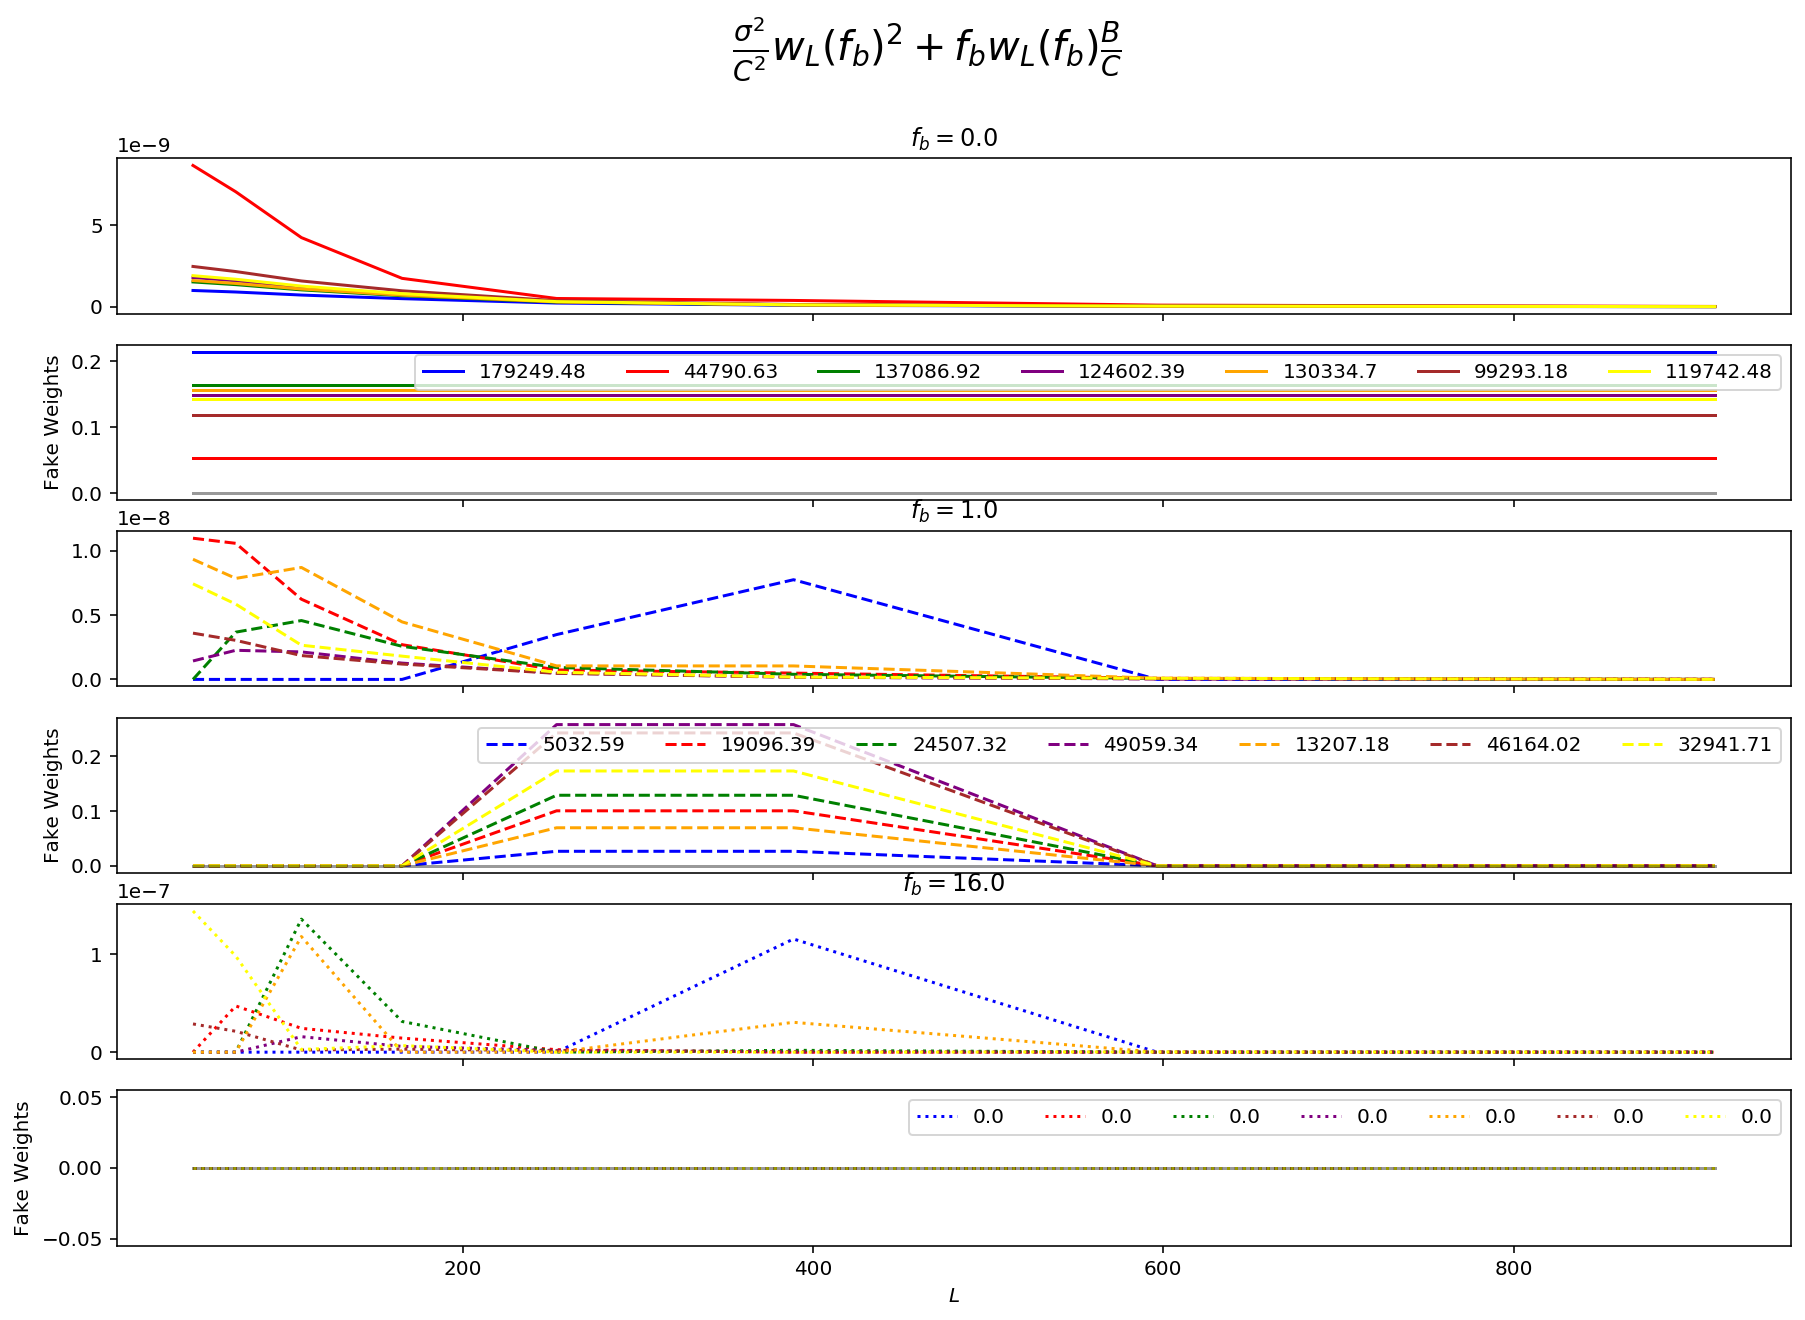

In [22]:
fig, axs = plt.subplots(nrows = 6, figsize = (15, 10), sharex = True)

fig.suptitle('$\\frac{\sigma^2}{C^2}w_L(f_b)^2+f_b w_L(f_b)\\frac{B}{C}$', size = 20)

for j, fb in enumerate([0., 1., 16.]):
    
    ls = ['-', '--', ':']
    
    somma = 0
    for e in estimators_lista:
        line = partial[e][fb]
        #line[line<1e-20] += 1e-20
        somma +=  np.nan_to_num(line**-1.)
    
    axs[2*j].set_title('$f_b=$'+f'{fb}')
    for i, e in enumerate(estimators_lista):
        line = partial[e][fb]
        axs[2*j].plot(Optimizerkk_lista.ells_selected, line, ls = ls[j], color = estimators_dictionary[e]['color'])
        weight = line**-1./somma#/1e4#NOTE division by 1e4
        weight = np.nan_to_num(weight)*np.nan_to_num(allws[e][fb]/sum([allws[es][fb]*partial[es][fb]**-1./somma for es in estimators_lista]))
        number = np.round(Optimizerkk_lista.integerate_discrete(weight, Optimizerkk_lista.ells_selected), 2)
        axs[2*j+1].plot(Optimizerkk_lista.ells_selected, weight, ls = ls[j], color = estimators_dictionary[e]['color'], label = number)
        
    axs[2*j+1].legend(ncol = len(estimators_lista))
    axs[2*j+1].set_ylabel('Fake Weights')
    axs[2*j+1].plot(Optimizerkk_lista.ells_selected, Optimizerkk_lista.ells_selected*0., color = 'black', alpha = 0.4)

axs[-1].set_xlabel('$L$')
  
patches = []
patches += [Line2D([0], [0], ls=':', color='w', label='16',
                        markerfacecolor='black', markersize=15)]    
patches += [Line2D([0], [0], ls='--', color='black', label='1',
                        markerfacecolor='black', markersize=15)] 
patches += [Line2D([0], [0], ls='-', color='w', label='0',
                        markerfacecolor='black', markersize=15)] 
plt.show()

In [164]:
np.nan_to_num(allws[e][fb]/sum([allws[es][fb] for es in estimators_lista]))

/home/r/rbond/omard/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([ 0.72415413, -0.        , -0.        ,  0.3841213 , -0.        ,
       -0.        , -0.        ,  0.        ])

In [165]:
weight

array([ 1.43728156e-15, -0.00000000e+00, -0.00000000e+00,  7.73034881e-15,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00])